<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_(_1_2)_n120_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_-1.2'

In [4]:
os.listdir(base_path)

['data_add_delta_-1.2_n20.csv',
 'data_add_delta_-1.2_n30.csv',
 'data_add_delta_-1.2_n60.csv',
 'data_add_delta_-1.2_n120.csv',
 'data_add_delta_-1.2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-1.2_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,95.593265,45.244928,96.316761,-0.011900,247.143054,247.153474,-0.010420
1,0.0,1.0,32.378765,53.489423,40.323056,0.003470,136.194714,136.187435,0.007279
2,0.0,2.0,43.717644,74.833501,76.843097,-0.004642,205.389601,205.392408,-0.002807
3,0.0,3.0,20.574486,57.417283,26.221629,-0.000097,114.213301,114.209429,0.003872
4,0.0,4.0,88.202306,80.844342,90.767707,-0.001373,269.812982,269.815647,-0.002665
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,31.128313,45.650077,43.132187,-0.016625,129.893953,129.906459,-0.012507
119996,999.0,116.0,39.528339,34.978275,46.669822,0.001668,131.178104,131.171726,0.006378
119997,999.0,117.0,28.271922,65.933781,77.418904,-0.009972,181.614635,181.621730,-0.007095
119998,999.0,118.0,99.025571,70.904011,82.554482,-0.005534,262.478530,262.484847,-0.006317


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,95.593265,45.244928,96.316761,-0.011900,247.143054,247.153474,-0.010420
1,0.0,1.0,32.378765,53.489423,40.323056,0.003470,136.194714,136.187435,0.007279
2,0.0,2.0,43.717644,74.833501,76.843097,-0.004642,205.389601,205.392408,-0.002807
3,0.0,3.0,20.574486,57.417283,26.221629,-0.000097,114.213301,114.209429,0.003872
4,0.0,4.0,88.202306,80.844342,90.767707,-0.001373,269.812982,269.815647,-0.002665
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,31.128313,45.650077,43.132187,-0.016625,129.893953,129.906459,-0.012507
119996,999.0,116.0,39.528339,34.978275,46.669822,0.001668,131.178104,131.171726,0.006378
119997,999.0,117.0,28.271922,65.933781,77.418904,-0.009972,181.614635,181.621730,-0.007095
119998,999.0,118.0,99.025571,70.904011,82.554482,-0.005534,262.478530,262.484847,-0.006317


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    95.593265  45.244928  96.316761  ...  247.143054  247.153474 -0.010420
      1.0    32.378765  53.489423  40.323056  ...  136.194714  136.187435  0.007279
      2.0    43.717644  74.833501  76.843097  ...  205.389601  205.392408 -0.002807
      3.0    20.574486  57.417283  26.221629  ...  114.213301  114.209429  0.003872
      4.0    88.202306  80.844342  90.767707  ...  269.812982  269.815647 -0.002665
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  31.128313  45.650077  43.132187  ...  129.893953  129.906459 -0.012507
      116.0  39.528339  34.978275  46.669822  ...  131.178104  131.171726  0.006378
      117.0  28.271922  65.933781  77.418904  ...  181.614635  181.621730 -0.007095
      118.0  99.025571  70.904011  82.554482  ...  262.478530  262.484847 -0.006317
      119.0  72.355097  50.574033  76.386435  ...  209.333945  209.313394  0.020550

[120000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    95.593265  45.244928  96.316761  ...  247.143054  247.153474 -0.010420
      1.0    32.378765  53.489423  40.323056  ...  136.194714  136.187435  0.007279
      2.0    43.717644  74.833501  76.843097  ...  205.389601  205.392408 -0.002807
      3.0    20.574486  57.417283  26.221629  ...  114.213301  114.209429  0.003872
      4.0    88.202306  80.844342  90.767707  ...  269.812982  269.815647 -0.002665
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  31.128313  45.650077  43.132187  ...  129.893953  129.906459 -0.012507
      116.0  39.528339  34.978275  46.669822  ...  131.178104  131.171726  0.006378
      117.0  28.271922  65.933781  77.418904  ...  181.614635  181.621730 -0.007095
      118.0  99.025571  70.904011  82.554482  ...  262.478530  262.484847 -0.006317
      119.0  72.355097  50.574033  76.386435  ...  209.333945  209.313394  0.020550

[120000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,95.593265,45.244928,96.316761,-0.011900,247.143054,247.153474,-0.010420
1,0.0,1.0,32.378765,53.489423,40.323056,0.003470,136.194714,136.187435,0.007279
2,0.0,2.0,43.717644,74.833501,76.843097,-0.004642,205.389601,205.392408,-0.002807
3,0.0,3.0,20.574486,57.417283,26.221629,-0.000097,114.213301,114.209429,0.003872
4,0.0,4.0,88.202306,80.844342,90.767707,-0.001373,269.812982,269.815647,-0.002665
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,31.128313,45.650077,43.132187,-0.016625,129.893953,129.906459,-0.012507
119996,999.0,116.0,39.528339,34.978275,46.669822,0.001668,131.178104,131.171726,0.006378
119997,999.0,117.0,28.271922,65.933781,77.418904,-0.009972,181.614635,181.621730,-0.007095
119998,999.0,118.0,99.025571,70.904011,82.554482,-0.005534,262.478530,262.484847,-0.006317


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    95.593265  45.244928  96.316761  ...  247.143054  247.153474 -0.010420
      1.0    32.378765  53.489423  40.323056  ...  136.194714  136.187435  0.007279
      2.0    43.717644  74.833501  76.843097  ...  205.389601  205.392408 -0.002807
      3.0    20.574486  57.417283  26.221629  ...  114.213301  114.209429  0.003872
      4.0    88.202306  80.844342  90.767707  ...  269.812982  269.815647 -0.002665
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  31.128313  45.650077  43.132187  ...  129.893953  129.906459 -0.012507
      116.0  39.528339  34.978275  46.669822  ...  131.178104  131.171726  0.006378
      117.0  28.271922  65.933781  77.418904  ...  181.614635  181.621730 -0.007095
      118.0  99.025571  70.904011  82.554482  ...  262.478530  262.484847 -0.006317
      119.0  72.355097  50.574033  76.386435  ...  209.333945  209.313394  0.020550

[120000 rows x 7 columns]

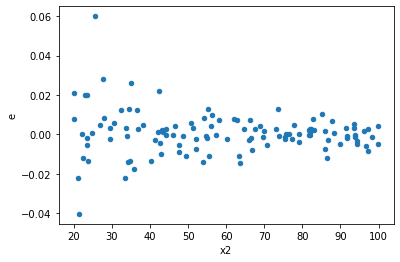

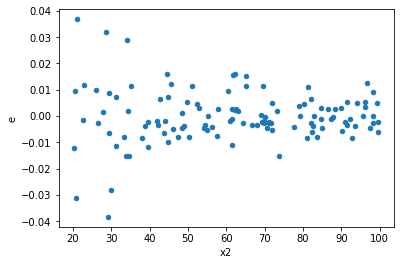

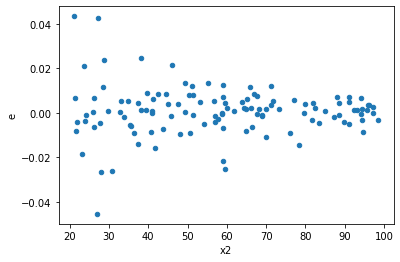

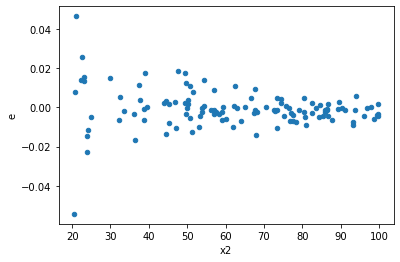

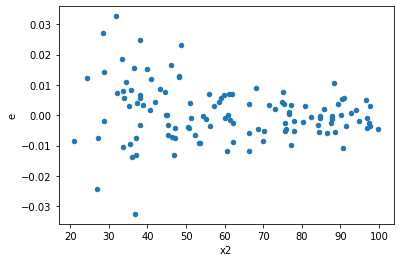

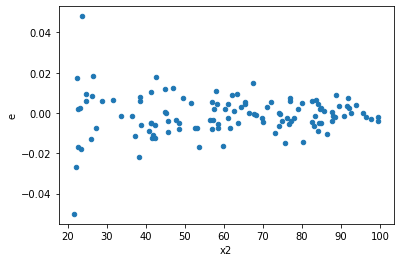

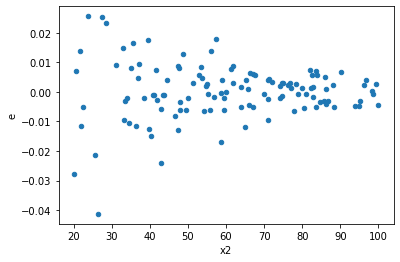

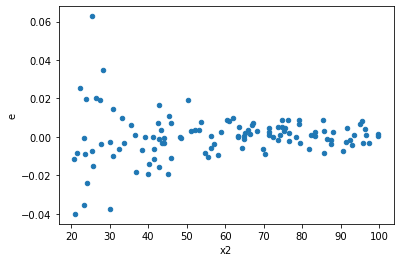

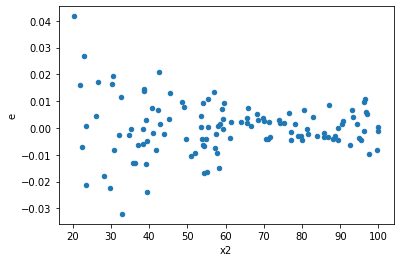

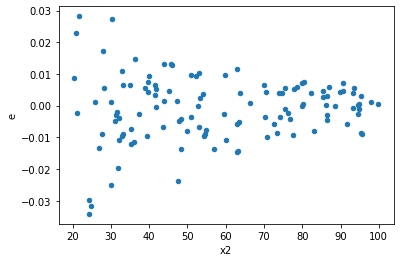

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,45.0,45.0,0.0008120415284524811,0.007499110115353891,1.8455489283010933e-05,0.00017043432080349752,0.1082850519543491,9.49008415422366e-12,Reject005=0 : Heteroscedasticity
1.0,45.0,45.0,0.0010929441659590787,0.009412763717538086,2.4839640135433607e-05,0.00021392644812586557,0.11611299282087355,3.37440103135019e-11,Reject005=0 : Heteroscedasticity
2.0,45.0,45.0,0.0008152080262949285,0.009098506210026242,1.8527455143066557e-05,0.00020678423204605097,0.08959800735164605,2.774098964457387e-13,Reject005=0 : Heteroscedasticity
3.0,45.0,45.0,0.0009747754489382072,0.012159458528664232,2.2153987475868347e-05,0.00027635133019691434,0.08016602438671999,3.298561972458285e-14,Reject005=0 : Heteroscedasticity
4.0,45.0,45.0,0.001280916316332212,0.0063858524814265055,2.9111734462095725e-05,0.00014513301094151149,0.2005865810489368,3.266162169659493e-07,Reject005=0 : Heteroscedasticity
5.0,45.0,45.0,0.00120364480914104,0.00786441731379128,2.7355563844114544e-05,0.00017873675713162,0.15304945822626834,4.180695608209482e-09,Reject005=0 : Heteroscedasticity
6.0,45.0,45.0,0.0006973156337975581,0.011181566066320248,1.5848082586308138e-05,0.0002541265015072784,0.062362966838601194,2.368616727621523e-16,Reject005=0 : Heteroscedasticity
7.0,45.0,45.0,0.001218769658253718,0.010913481184687655,2.7699310414857227e-05,0.0002480336632883558,0.11167560905898051,1.6658580834150693e-11,Reject005=0 : Heteroscedasticity
8.0,45.0,45.0,0.0011073763564328418,0.004735710218053841,2.5167644464382767e-05,0.00010762977768304185,0.2338353289040397,3.2093912471803454e-06,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64